# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project_2/ExtraaLearn.csv')
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


**Check the info of the set**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

1.) 4 numerical data columns -> (age, time_spent_on_website, website_visits, page_views_per_visit)

2.) 11 catagorical -> everything including status as it is a yes or no variable represented as a int)

3.) no missing values

In [ ]:
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

a lot of the data is yes or no (2 unique values)

id will not provide any insight since the number of values equals the number of unique values



**Drop ID since it provides no input**

In [ ]:
df = df.drop(['ID'], axis = 1)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [ ]:
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1',
            'print_media_type2', 'digital_media', 'educational_channels', 'referral',
            'status']

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


**Observations**

average age is 46, with a min of 18 and max of 63 suggesting a wide range of diversity for data

the webiste vists stick around 3 as the mean and median are very similar, but the mean is higher due to possible outliers. that could also explain wy the man is 30 but mean and median are in the 3-3.5 range. possible explaination is advertising the website to show to other or having confusion about the website

website visits, time spent, and page views have much more range on the higher side of the median. again could relate to people advertising the website to their friends or accidents like leaving the computer on

extreme values on the higher side of the range mainly betweent the 3rd quartile and the max value for website visits and page views

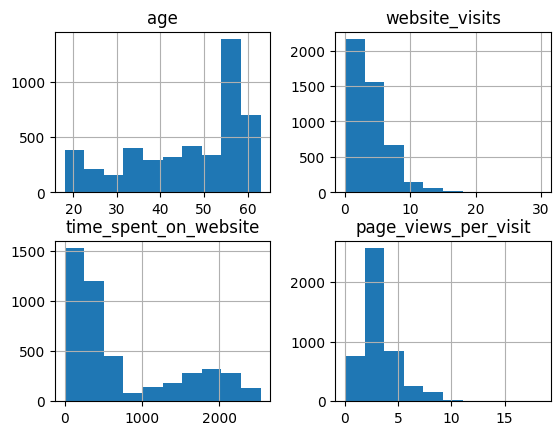

In [ ]:
df[num_cols].hist()
plt.show()

**Observations**

age is very left scewed, meaning the interest mainly resided in the older population but there is still almost uniform interest from 33-55. interest is lower int the 20-30 range

website visits and time spent on website is right scewed. could assume the upper range shows a lot of interest

page visits is normally distributed so not much info given

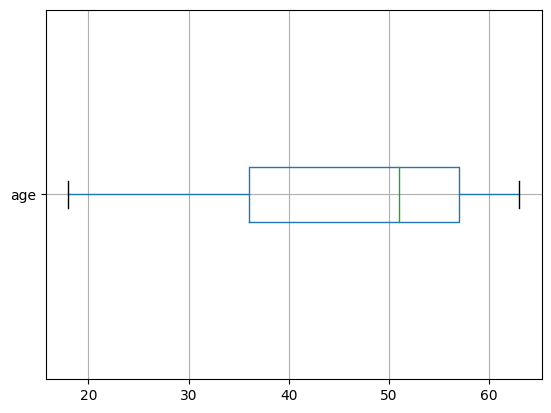

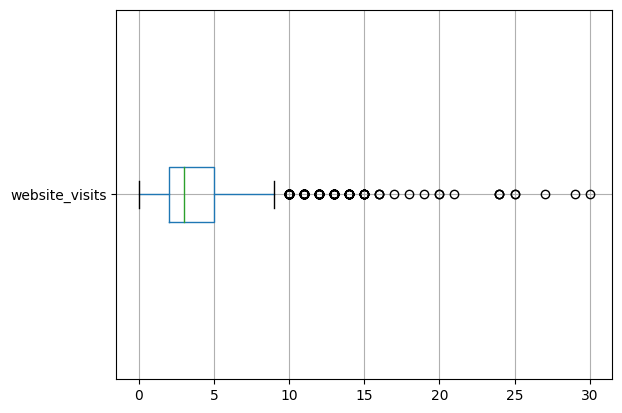

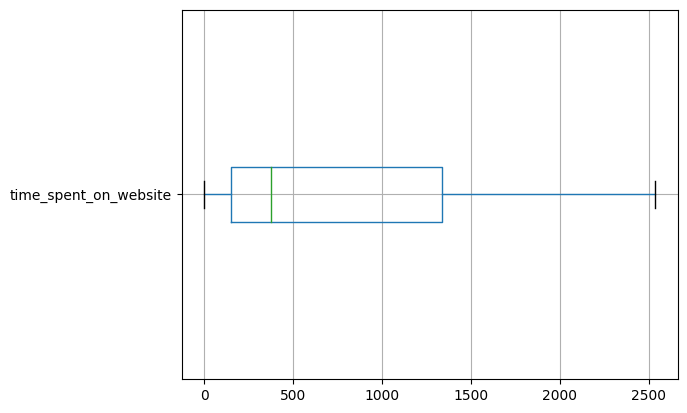

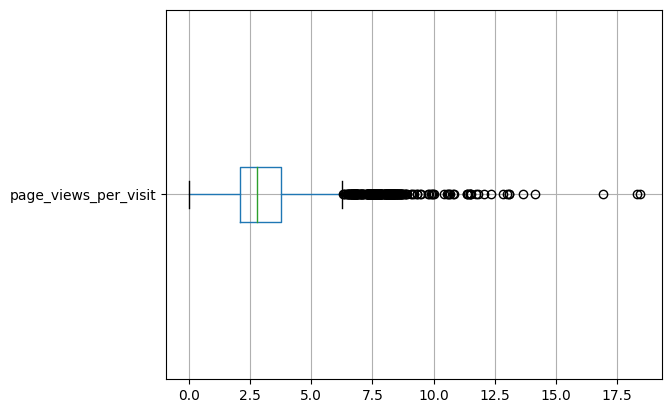

In [ ]:
for column in num_cols:
    plt.figure()
    df.boxplot([column], vert = False)

**Observations**

website visits and page views per visit show many outliers, but that could relate to customers with a lot of interest

In [ ]:
for i in cat_cols:
  print(df[i].value_counts(normalize = True))
  print('_'*30)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
______________________________
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
______________________________
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
______________________________
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
______________________________
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
______________________________
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
______________________________
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
______________________________
educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dty

**Observations**

large interest from people with a professional occupation (56.7 percent of all interest)

first interaction is split between the app and the website, barely favoring the website. meaning this doesnt give much insight

most people fill out at least 50 percent of the profile, with only 2.32% of people not fillinf out at least 50%. not much distinction between high and medium

email seems to be the most common style of last activity with 49 percent having email as the last activity whilt the other 51% split evenly between phone adn website. could be assumed that this is because the company is reacing out and teh lead is reaching out, so two paths of interaction

most people havent seen a ad in the news paper, magazine, or digital media. implies that the ads are a common theme with potential leads.

news paper seems to be the least common medium fo advertisement as 5-10% less people say they saw a ad in the paper

most people came without a referral (~98%)

29.86% of potential leads are converted into customers








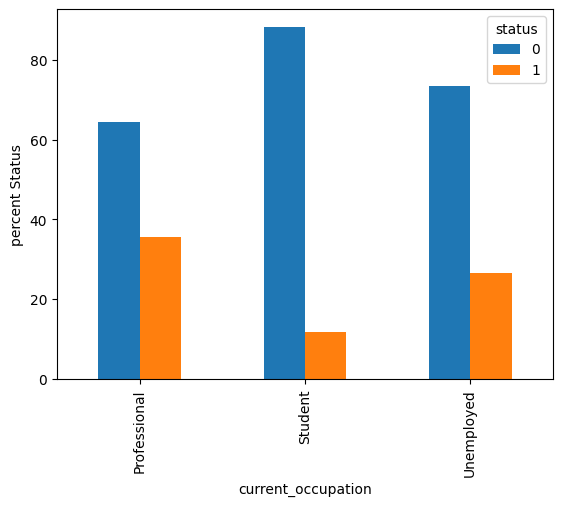

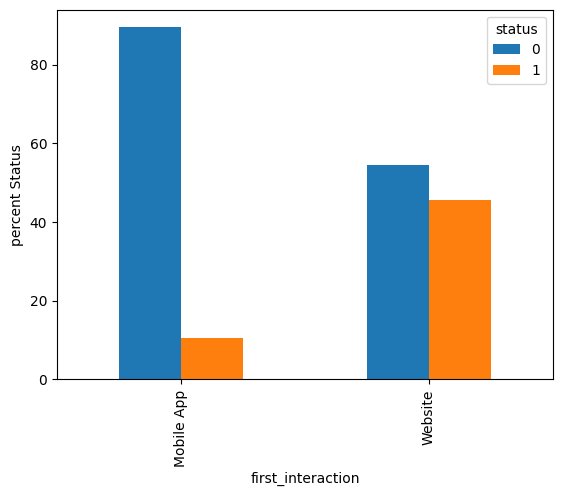

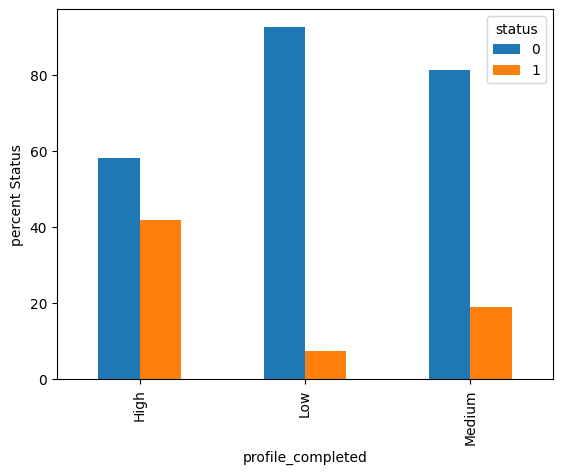

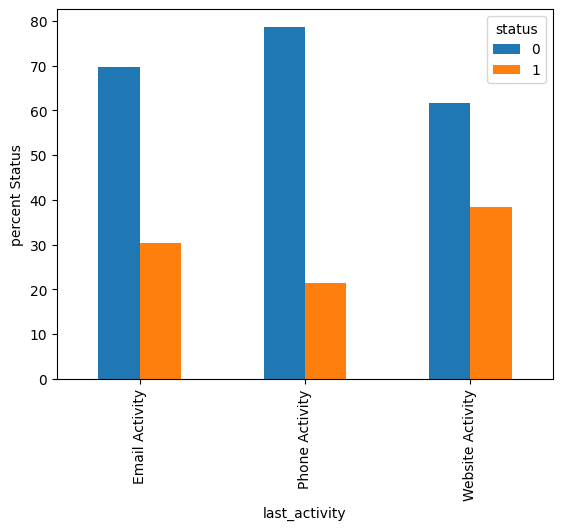

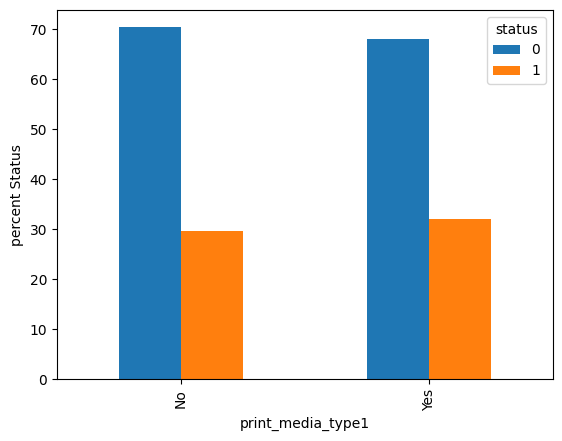

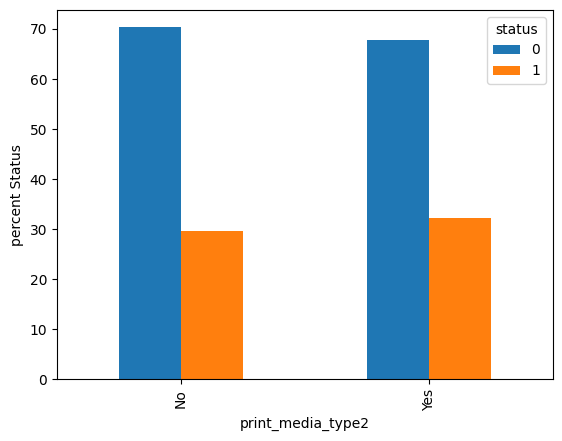

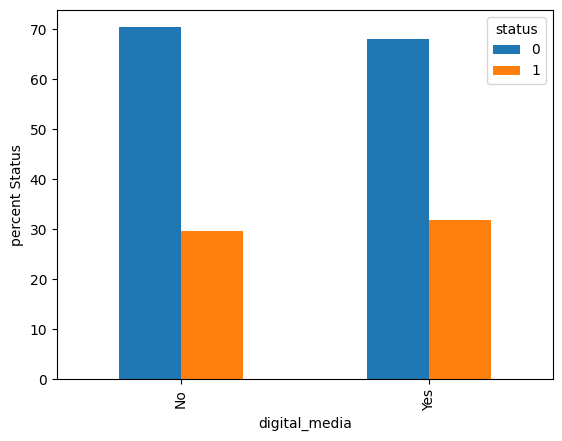

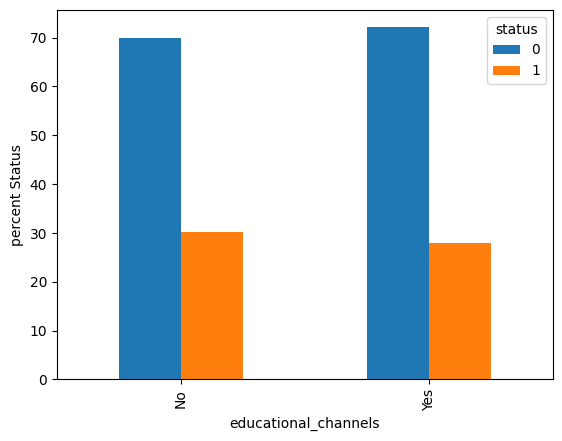

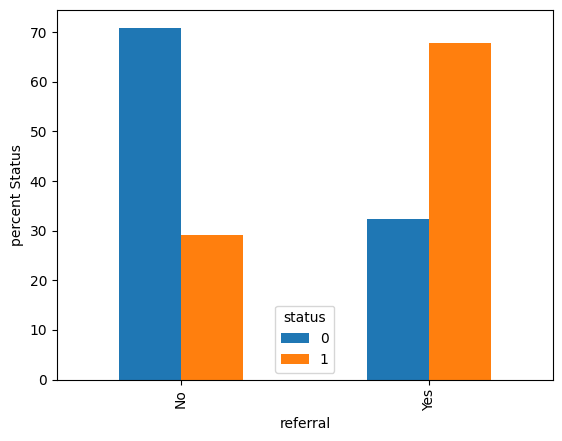

In [ ]:
for i in cat_cols:
  if i != 'status':
    (pd.crosstab(df[i], df['status'], normalize = 'index') * 100).plot(kind = 'bar')
    plt.ylabel('percent Status')

**Observations**

students have a very low conversion rate, and professionals have the highest

mobile app struggles to convert leads, while just under half of all first time viewers through the website are converted

the lower the percent of the profile is completed, the lower the conversion rate to customer is

website last activity has the highest conversion rate and phone has the lowest

the print_media_type1 and 2 along with digital media all follow the same pattern and whether they saw it our not does not seem to effect  the conversion rate. all have about 30% convert for both no and yes.

education channel doesnt seem to have a effect on the ration of people that convert

referrals are much more likely to convert




In [ ]:
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


**Observations**

main difference is that people lwho become customers have a much higher time_spent_on_website average

<Axes: >

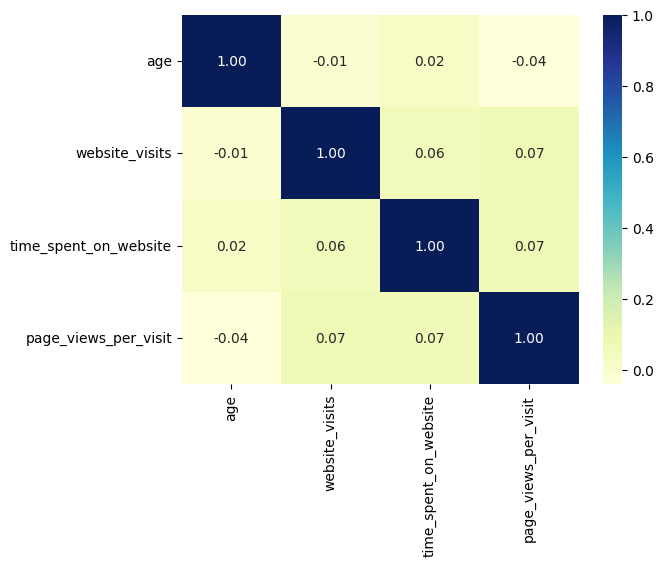

In [ ]:
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap = 'YlGnBu')

**Observations**

not much correlation between any of the numerical variables

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
to_get_dummies = ['current_occupation','profile_completed','last_activity','first_interaction']
dict_yes_no = {'Yes':1, 'No':0}

df = pd.get_dummies(data = df, columns = to_get_dummies, drop_first=True)
df['referral'] = df.referral.map(dict_yes_no)
df['educational_channels'] = df.educational_channels.map(dict_yes_no)
df['digital_media'] = df.digital_media.map(dict_yes_no)
df['print_media_type2'] = df.print_media_type2.map(dict_yes_no)
df['print_media_type1'] = df.print_media_type1.map(dict_yes_no)

In [ ]:
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,first_interaction_Website
0,57,7,1639,1.861,1,0,1,0,0,1,False,True,False,False,False,True,True
1,56,2,83,0.320,0,0,0,1,0,0,False,False,False,True,False,True,False
2,52,3,330,0.074,0,0,1,0,0,0,False,False,False,True,False,True,True
3,53,4,464,2.057,0,0,0,0,0,1,False,True,False,False,False,True,True
4,23,4,600,16.914,0,0,0,0,0,0,True,False,False,False,False,False,True


In [ ]:
Y = df.status
X = df.drop(columns = ['status'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, random_state=1, stratify=Y)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df.info()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_num = df.select_dtypes(include=numerics)
df_cat = df.select_dtypes(exclude=numerics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   print_media_type1               4612 non-null   int64  
 5   print_media_type2               4612 non-null   int64  
 6   digital_media                   4612 non-null   int64  
 7   educational_channels            4612 non-null   int64  
 8   referral                        4612 non-null   int64  
 9   status                          4612 non-null   int64  
 10  current_occupation_Student      4612 non-null   bool   
 11  current_occupation_Unemployed   4612 non-null   bool   
 12  profile_completed_Low           46

**NUMERICAL ANALYSIS**

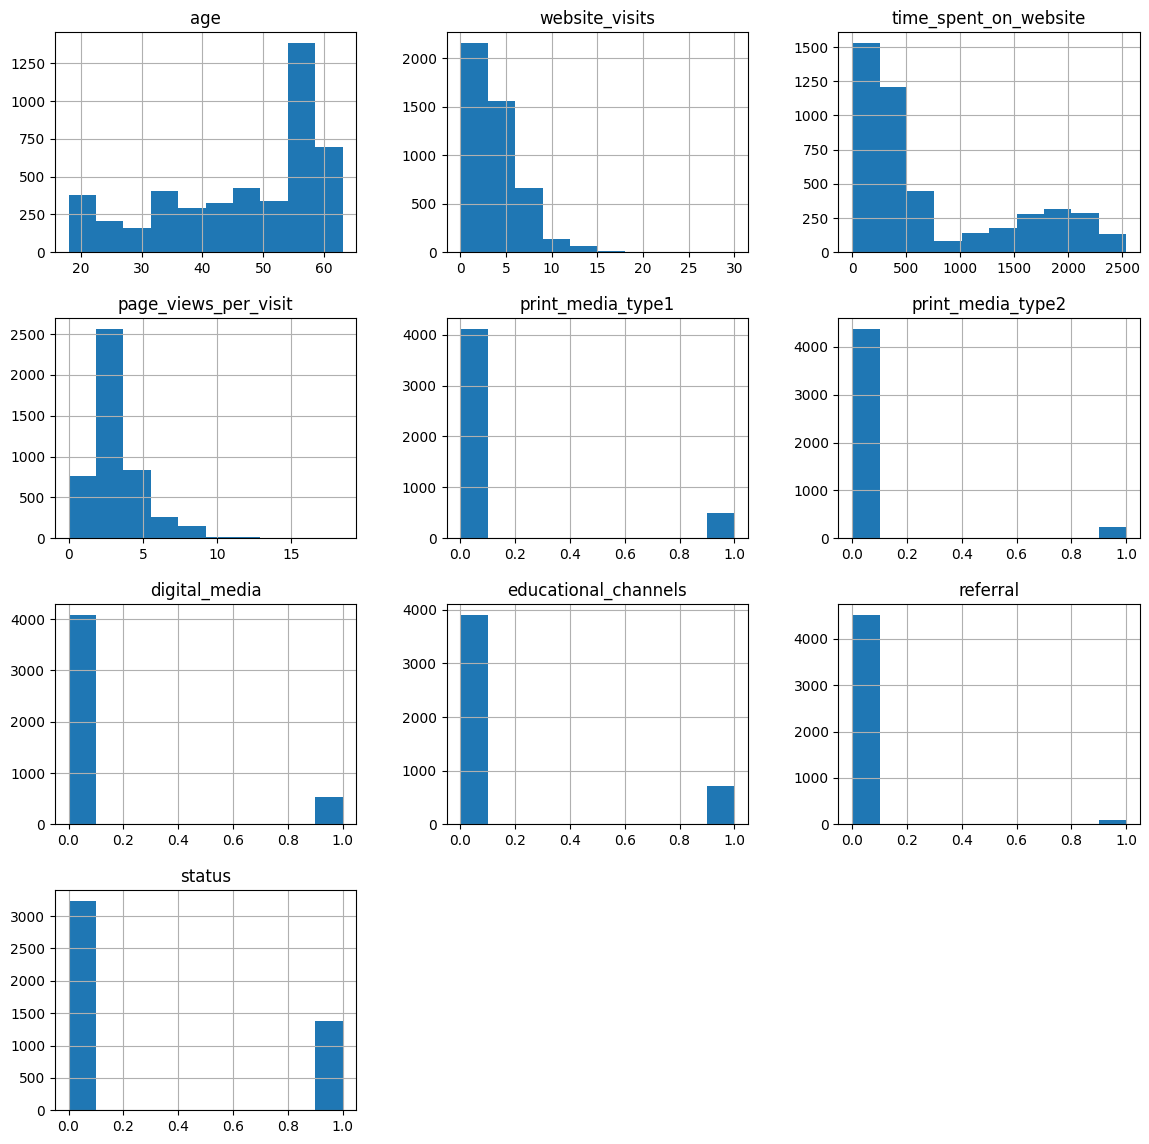

In [ ]:
df_num.hist(figsize=(14,14))
plt.show()

**Observations**

media seems to not be reaching its audience as very few report seeing the ads



<Axes: >

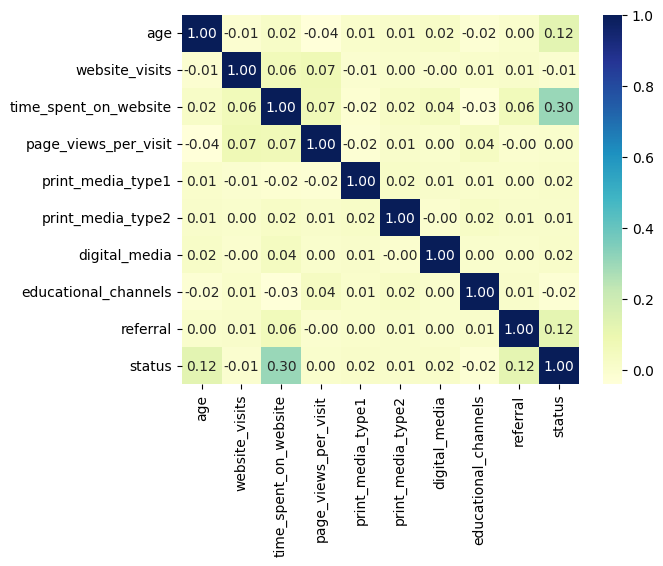

In [ ]:
corr = df_num.corr()
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'YlGnBu')

**Observations**

age, time spent on website, and referral seem to have the most psoitive correlation with status, although they arent strong. the strongest is time spent on website at .30

**CATAGORICAL ANALYSIS**

In [ ]:
for i in df_cat:
  print(df[i].value_counts(normalize = True))
  print("*"*40)


current_occupation_Student
False    0.879662
True     0.120338
Name: proportion, dtype: float64
****************************************
current_occupation_Unemployed
False    0.687554
True     0.312446
Name: proportion, dtype: float64
****************************************
profile_completed_Low
False    0.9768
True     0.0232
Name: proportion, dtype: float64
****************************************
profile_completed_Medium
False    0.514094
True     0.485906
Name: proportion, dtype: float64
****************************************
last_activity_Phone Activity
False    0.732437
True     0.267563
Name: proportion, dtype: float64
****************************************
last_activity_Website Activity
False    0.761492
True     0.238508
Name: proportion, dtype: float64
****************************************
first_interaction_Website
True     0.551171
False    0.448829
Name: proportion, dtype: float64
****************************************


## Building a Decision Tree model

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['not customer', 'customer'], yticklabels=['not customer', 'customer'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
dt = DecisionTreeClassifier(class_weight={0: 0.701431, 1: 0.298569}, random_state=1)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.701431, 1: 0.298569}, random_state=1)

## Do we need to prune the tree?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



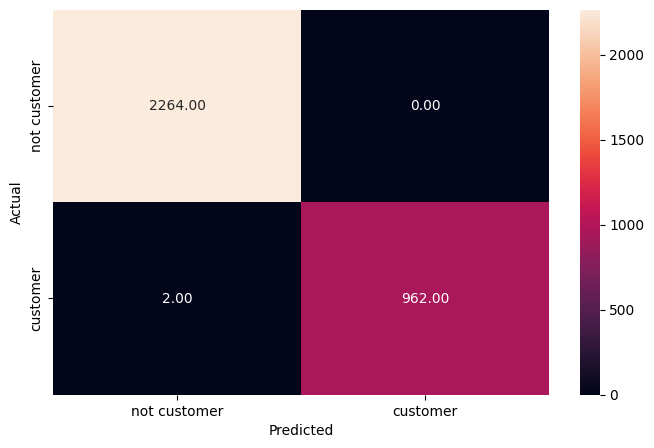

In [ ]:
y_train_pred = dt.predict(X_train)

metrics_score(Y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       971
           1       0.67      0.68      0.68       413

    accuracy                           0.80      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.80      0.81      1384



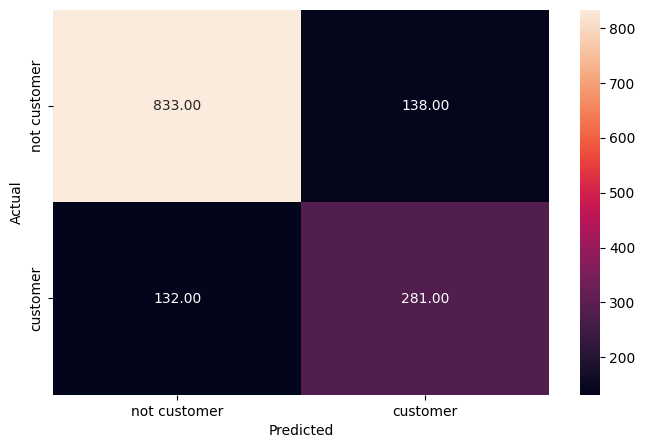

In [ ]:
y_test_pred_dt = dt.predict(X_test)

metrics_score(Y_test, y_test_pred_dt)

**Observations and Conclusion**

**yes** we need to prune as the training data outproforms the test data significantly which is a sign of overfitting.

although it fit the metrics of the training well, it has a low precision and recall for the test data

recall is down to .68 instead of 1 and precision is down to .67. therefore there is overfitting

predicts that 32% of people were not seen as potential customers when they are. (1-.68)




**Test Again**

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2264
           1       0.81      0.80      0.80       964

    accuracy                           0.88      3228
   macro avg       0.86      0.86      0.86      3228
weighted avg       0.88      0.88      0.88      3228



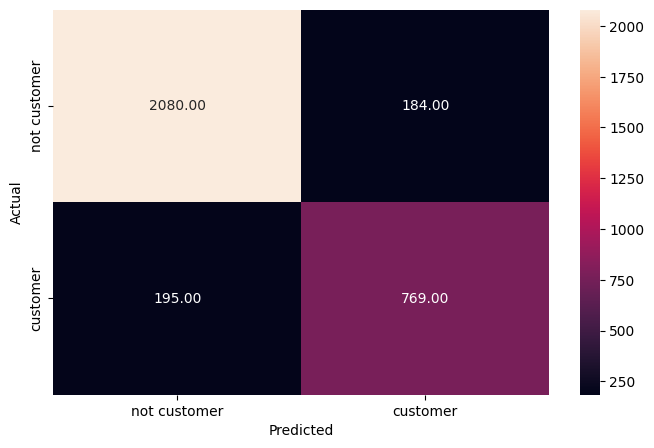

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       971
           1       0.78      0.75      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



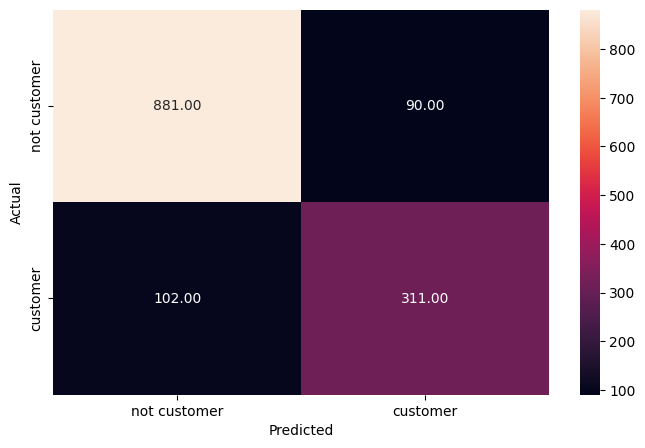

In [530]:
dt = DecisionTreeClassifier(random_state=1)

dt_params = [{'max_depth': list(range(3, 12)), 'criterion': ['gini', 'entropy'], 'max_features': list(range(0,16))}]
dt_better = GridSearchCV(dt, dt_params, cv = 10, scoring = 'accuracy')

dt_better.fit(X_train, Y_train)

y_train_pred = dt_better.predict(X_train)

metrics_score(Y_train, y_train_pred)

y_test_pred_dt = dt_better.predict(X_test)

metrics_score(Y_test, y_test_pred_dt)

**Observations**

due to the asks of the company, we favored accuracy because it is the middle-ground of recall and precision. they dont want to miss potential customers due to being too precise but they dont want to overestimate how many people have interest due to the lmited resources they have.

this newly trained model experiences a drop in accuracy in the trained data but that is because it isnt overfitting. it experiences a increase in accuracy by .06 or 6% in the test data and shows consistency with the train data results, showing that the model is better fit to handle any data, not just the data it was trained on

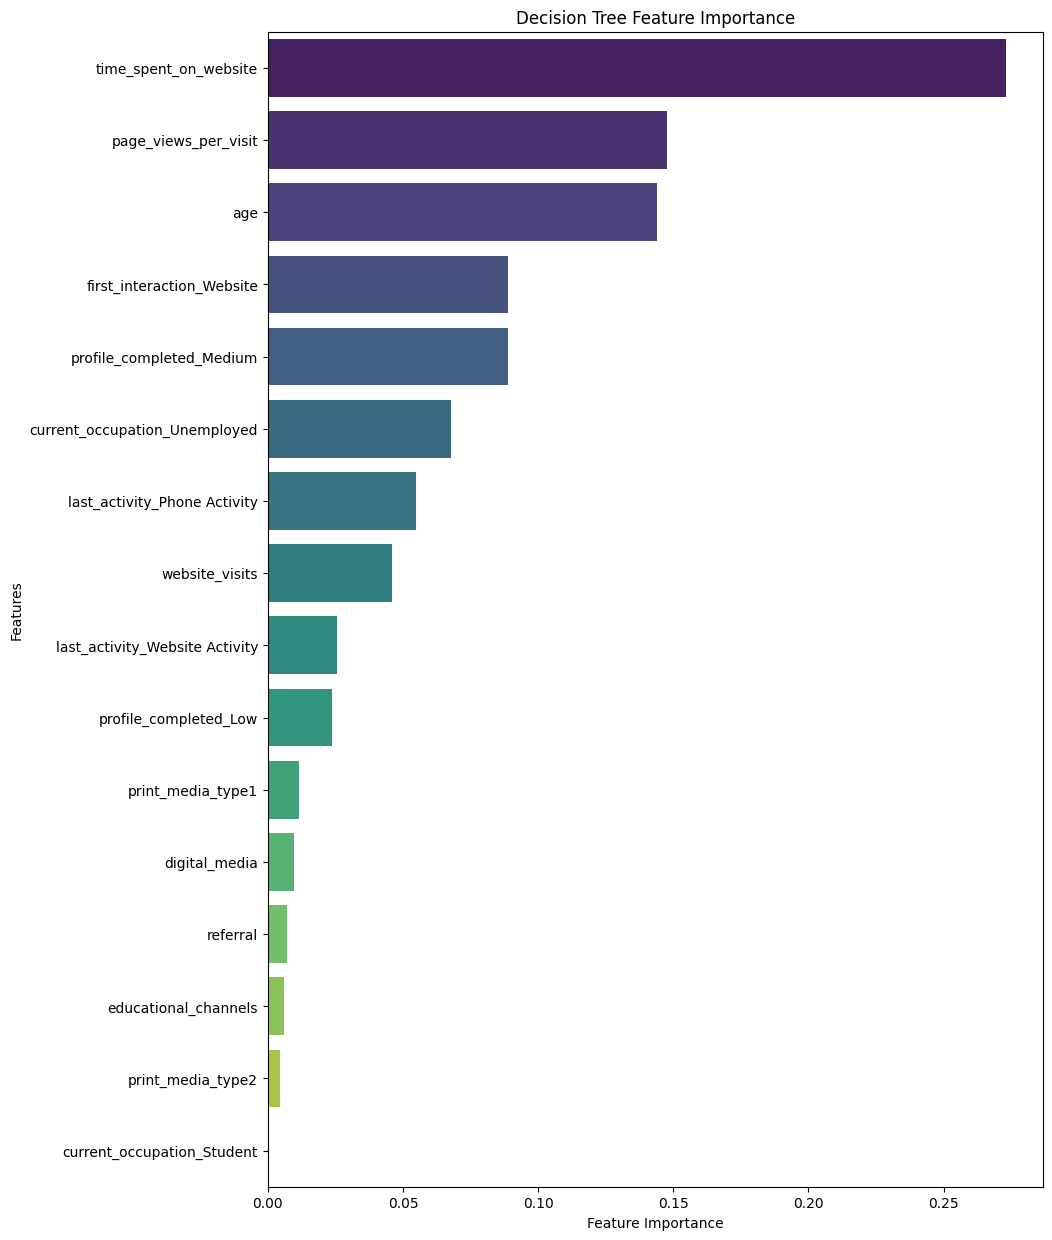

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns

# Creating a DataFrame with feature importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 15))
sns.barplot(x=importance_df['Importance'], y=importance_df.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

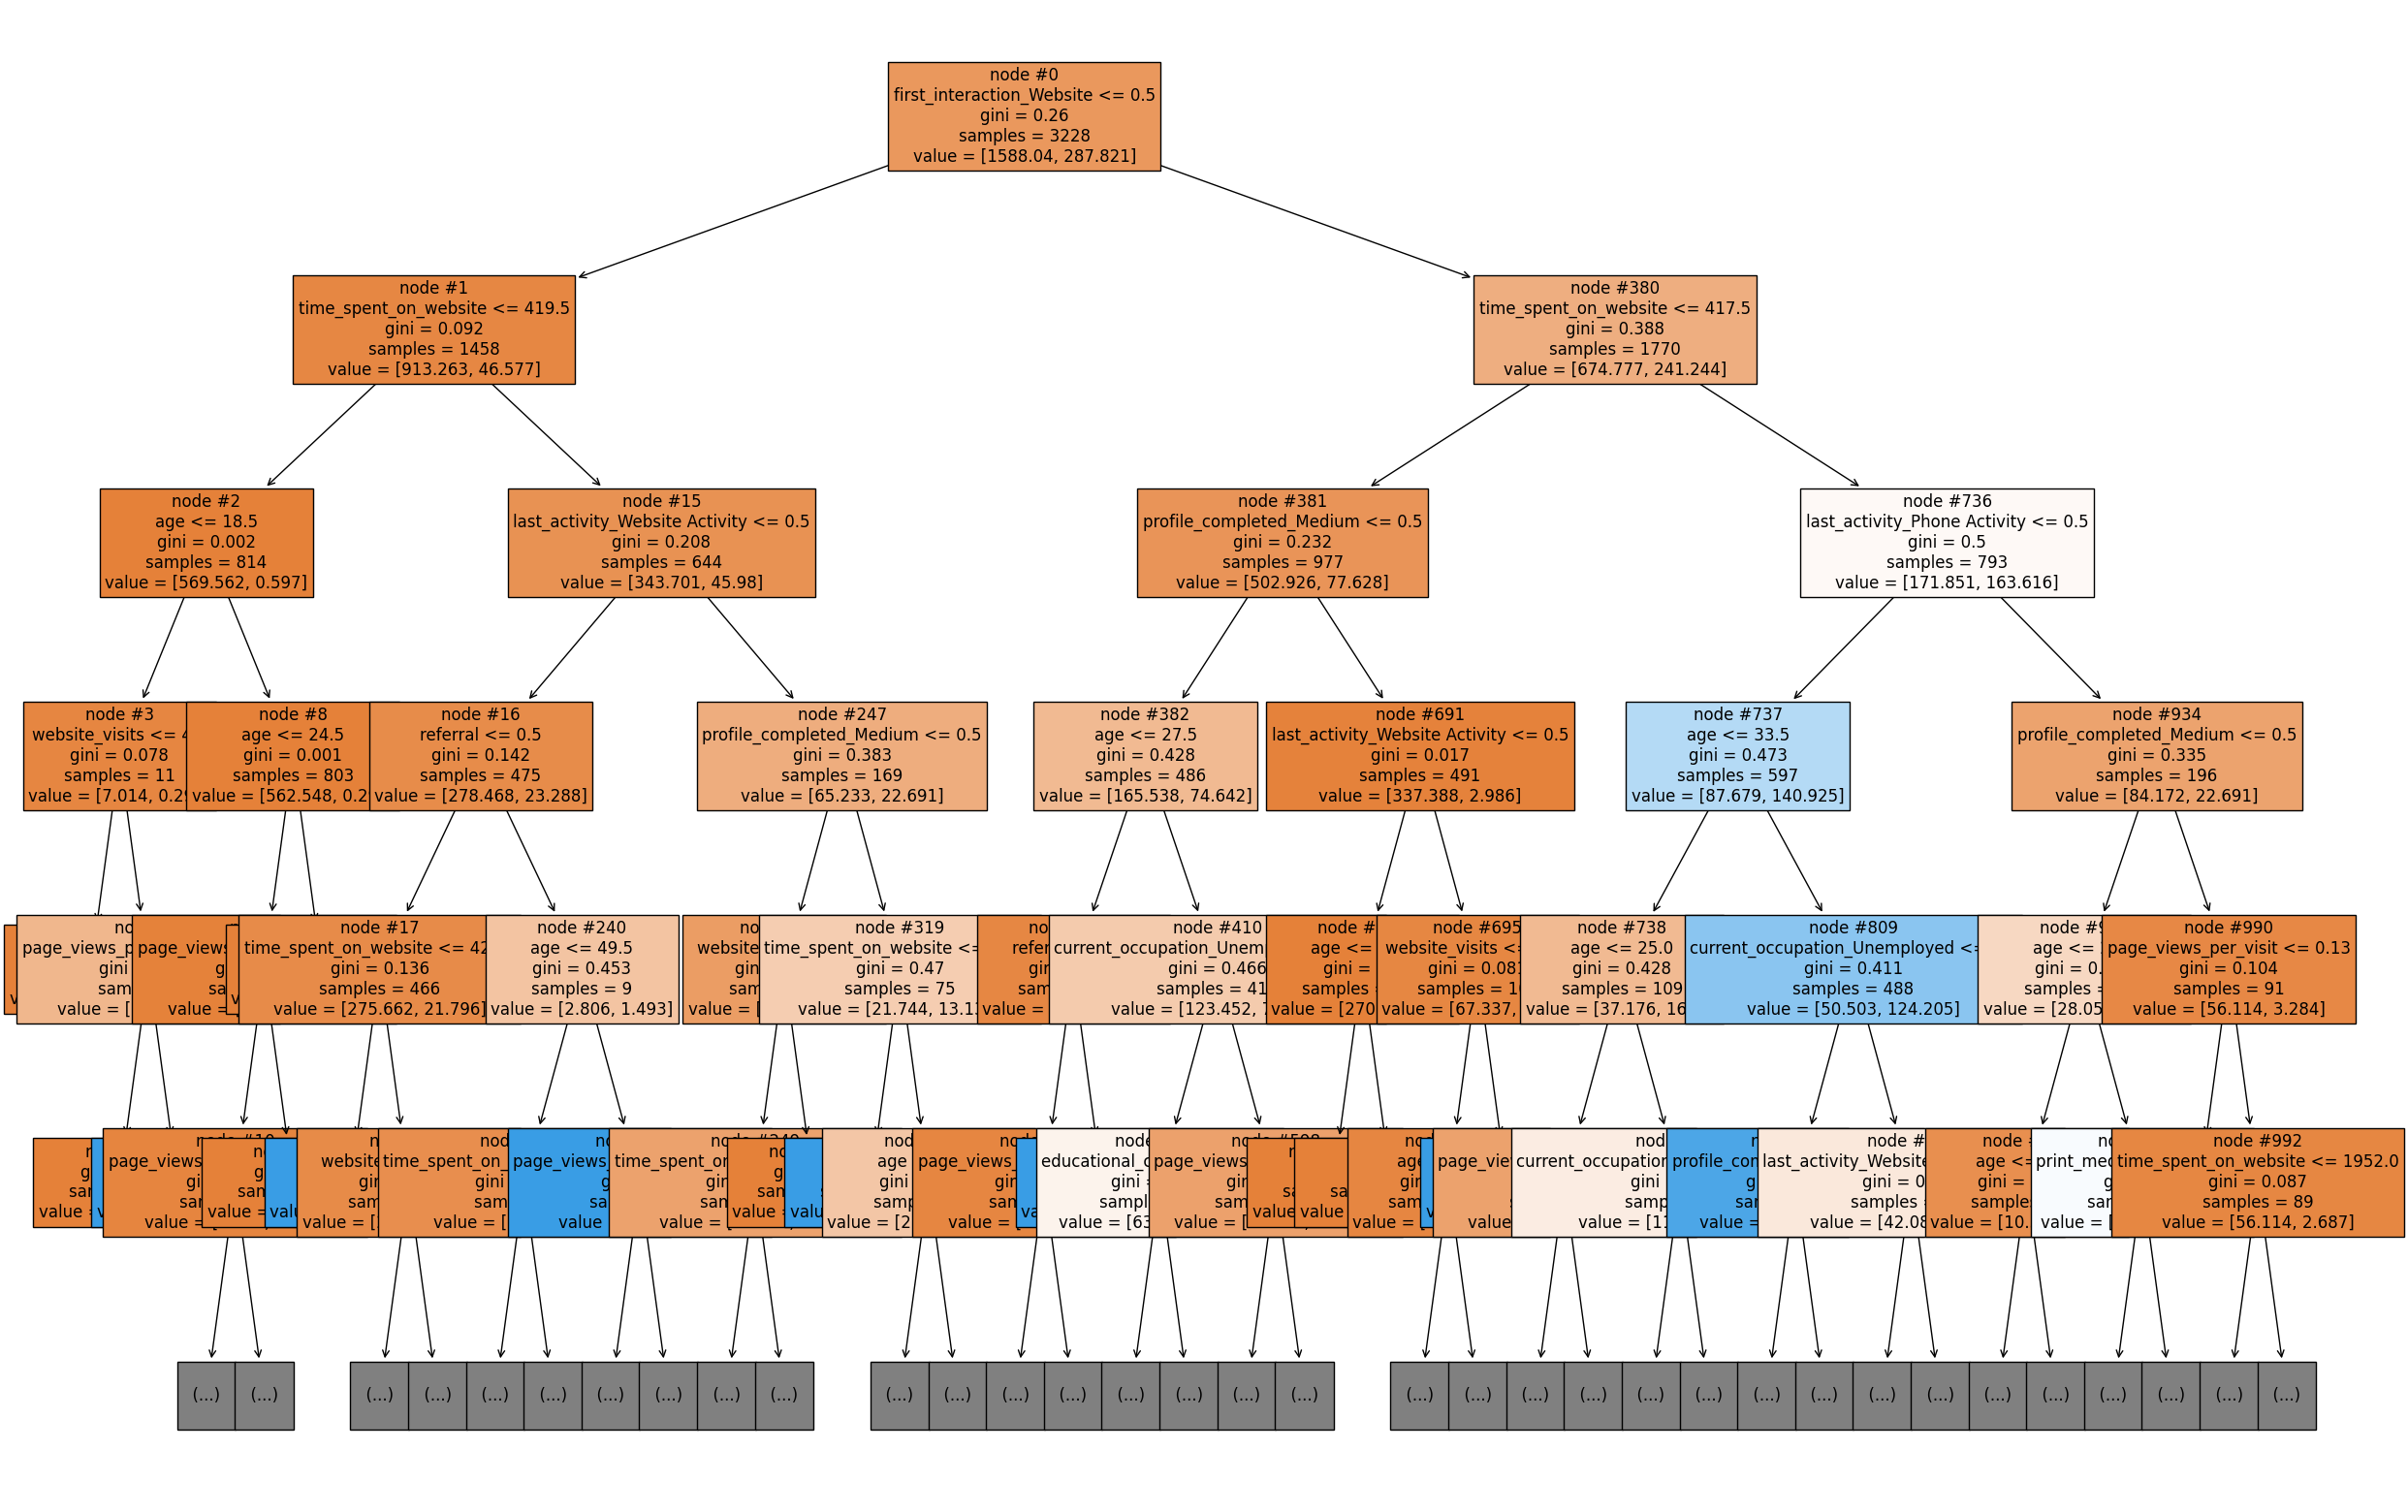

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 5, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = None)

plt.show()

**Observations**

the most significant factors are time spent on website, page views per visit and age.

## Building a Random Forest model

In [ ]:
rf_estimator = RandomForestClassifier(random_state = 1)
rf_estimator.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

## Do we need to prune the tree?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



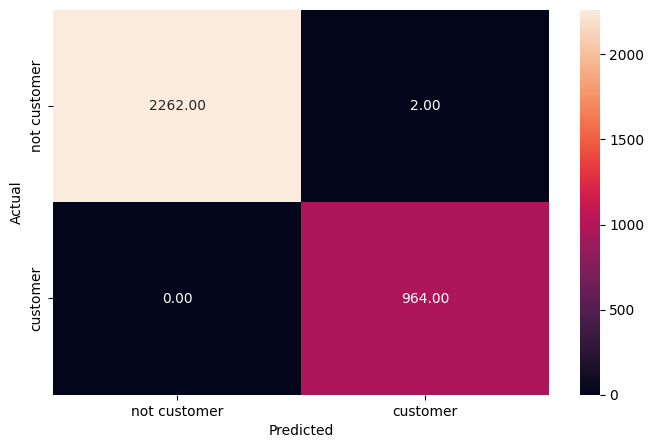

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(Y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



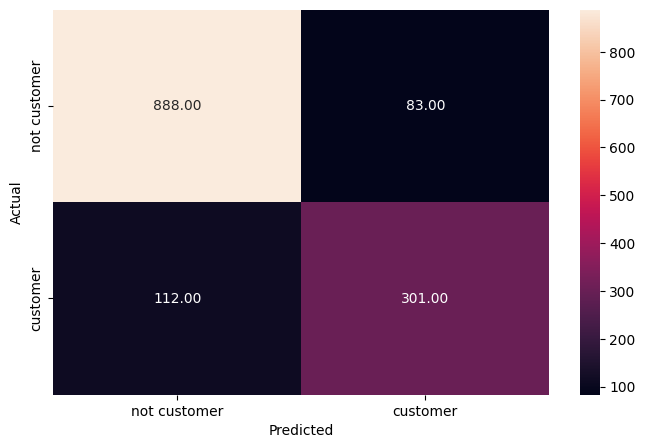

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(Y_test, y_pred_test_rf)

**Observations and Conclusion**

**YES** we need pruning due to the fact that the training data performed way better than the test data. the training data was 100% accurate but the test data is only 78 percent accurate on precision and 73% accurate for recall when it comes to potential customers.

this means that 27% of leads were not seen as potential customers when they were, which could lead to a loss of business if the model isnt adjusted

**TEST AGAIN**

In [531]:
rf_estimator = RandomForestClassifier(random_state = 1)

forest_params = [{'max_depth': list(range(3, 14)), 'criterion': ['gini', 'entropy'],'max_features': list(range(2,14))}]

clf = GridSearchCV(rf_estimator, forest_params, cv = 5, scoring='accuracy')

In [532]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                          'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                           13]}],
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2264
           1       0.85      0.84      0.84       964

    accuracy                           0.91      3228
   macro avg       0.89      0.89      0.89      3228
weighted avg       0.91      0.91      0.91      3228



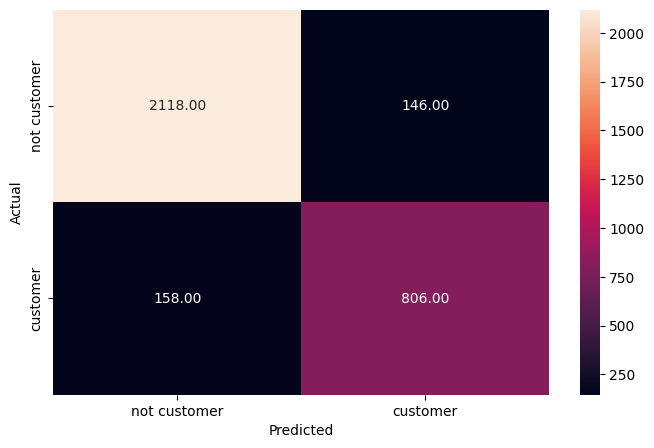

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       971
           1       0.78      0.75      0.77       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



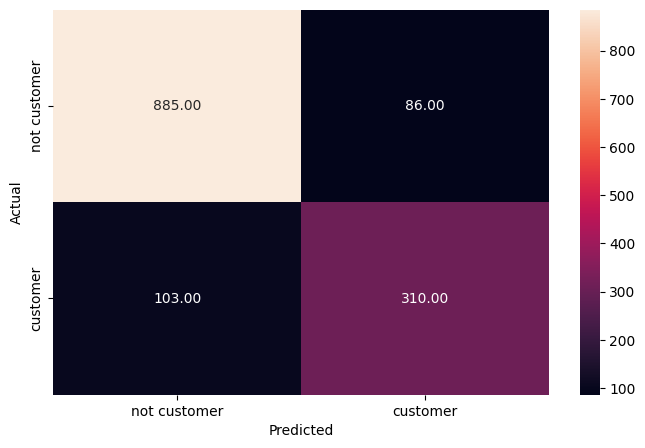

In [533]:
# Checking performance on the training data
y_pred_train_rf = clf.predict(X_train)

metrics_score(Y_train, y_pred_train_rf)

# Checking performance on the training data
y_pred_test_rf = clf.predict(X_test)

metrics_score(Y_test, y_pred_test_rf)

the accuracy was lowered on the training data but increased on the testing data because some of the overfitting was removed. this model also has better performance in predicting a 1 or not. in both recall and precision

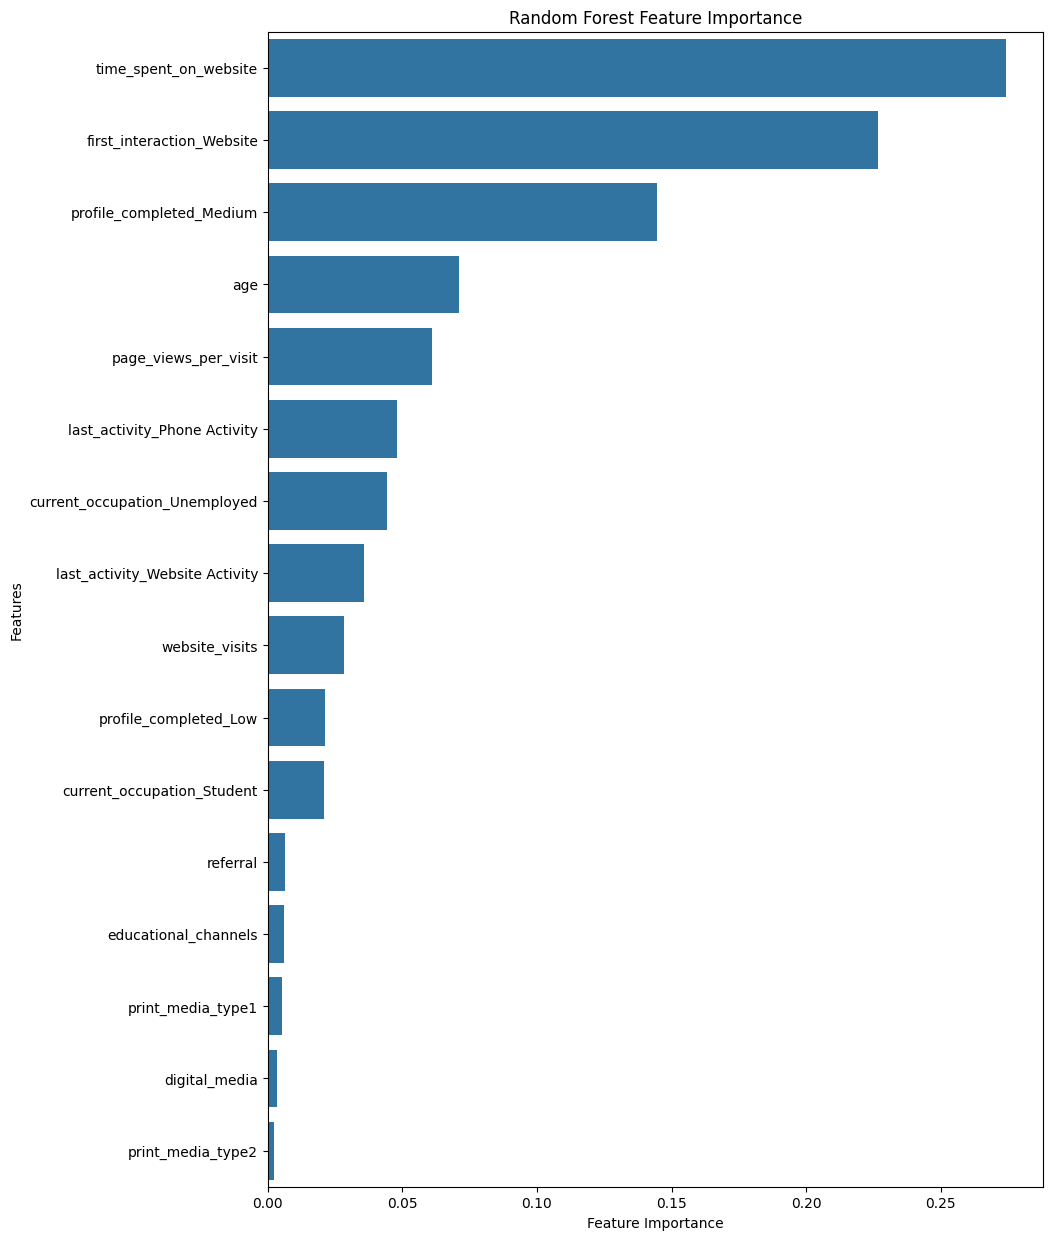

In [534]:
importances = clf.best_estimator_.feature_importances_
columns = X.columns

# Creating a DataFrame with feature importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 15))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

**Observations**

this is different than the normal decision tree as the top three changes. age became less significant and profile completed medium became more significant. also current_occupation_Student gained importance.

the time spent on website and the ammount of the profile completed are good indicators of interest because the more time they spend on the website or filling out the profile most likely represents thier interest.

Age still shows an importance and shows that there is a age range that is more likely to become a customer. that range is within the 50s and 60s.

the last activity can show the type of interest as leads who call or go on the website are showing intentional interest, while emails can be sent to the leads from the company, which isnt showing interest from the customer

employment is an important feature because someones employment affects someones income or spending, someones free time to interact with the website, and potential usecases. example, unemployed people might show interest to get their skills up to gain employment, so they might show interest in educating themselves more

referrals were shown earlier to be more likely to convert to a customer, so it is important to note if a lead has come in with a referral



## Actionable Insights and Recommendations

**Recommendations**



We saw that there was 5 large factors consistent when observing the importance of features. age, first_interaction_website, page_views_per_visit, profile_completed_medium or higher and time spent on website. so lets break these down

**Age** - the older population seems to be more likely to be converted to a customer since they show more interest. this range is in between 46-63

**First Interaction Website** - this could be because the website is a better form of advertisement than the mobile app, and that the mobile app lack the appeal to the leads

**profile Completed Level** - this is also a measure of interest because, as show in the previous graphs and models, the amount of a profile a lead has completed correlates to thier interst in the program. the more they complete on a profile, the more you can assume they are strong leads

**time spent on website** - those who spend the most time on your website are stronger leads, they are on you website because they are most likely reading into the program as a potential buyer. so target those who spend more time on the website.


**Page Views Per Visit** - the more page views someone has on the website correlates to their interest in the education program, so target those who show more interaction with your website

also time spent and page views tend to have many outliers, but the outliers have a strong potential to be converted to customers due to the positive correlation.

*************************************
**Other important factors**

**Referrals** - people who ahve referrals have a high conversion rate (60-70%), but referrals dont happen enough to hold a lot of weight in the models.

**Profession** - since the EdTech is a professional education company, people in the professional field or actively trying to enter the professional field will be more commonly converted to customers. this is supported by the data analysis when you see student are a small portion of the data (about 12%), and students are rarely converted to customers (about 10%).


**not as important**
the media factors dont seem to make a difference as the conversion rate is the same for if a lead has seen a ad or not. also, very few people have seen ads in any of the media spaces.

conversion rate was ~30% for yes and no for all the media types










In [537]:
!pip install nbconvert
%cd "/content/drive/My Drive/ColabNotebooks/project_2"
!jupyter nbconvert --to html Aiden_Shaffer_Learner+Notebook+-+Full+Code+Version+-+Potential+Customers+Prediction.ipynb

/content/drive/My Drive/ColabNotebooks/project_2
[NbConvertApp] WARNING | pattern 'Aiden_Shaffer_Learner+Notebook+-+Full+Code+Version+-+Potential+Customers+Prediction.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]